<a href="https://colab.research.google.com/github/gabriel-cm-saldanha/AirbnbAnalysis/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Paris

##Airbnb

<center><img alt="Analisando Airbnb" width="25%" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/512px-Airbnb_Logo_B%C3%A9lo.svg.png"></center>



O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais. Em 2024, o Airbnb conta com mais de **1.5 bilhão de reservas realizadas**

Atualmente, a empresa já conta com mais de **5 milhões de anfitriões** e mais de **7.7 milhões de comodidades** listadas na plataforma, contando com mais de 150 milhões de usuários ativos segundo o site [Search Logistics](https://www.searchlogistics.com/learn/statistics/airbnb-statistics/#:~:text=There%20are%20currently%20over%205,booked%20over%201.5%20billion%20stays)

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


## Paris
<center><img alt="Torre Eifel" width="70%" src="https://www.melhoresdestinos.com.br/wp-content/uploads/2019/02/passagens-aereas-paris-capa2019-02.jpg"></center>

Paris, a capital da França, é uma importante cidade europeia e um centro mundial de arte, moda, gastronomia e cultura. Sua paisagem urbana do século XIX é cortada por avenidas largas e pelo rio Sena. A cidade é conhecida por monumentos como a Torre Eiffel e a Catedral de Notre-Dame, uma construção gótica do século XII, sendo famosa também pela cultura dos cafés e por lojas de estilistas famosos na Rue du Faubourg Saint-Honoré.



Paris é uma região dividida em 20 *Arrondissements* (Distritos). Estes 20 arrondissements estão distribuídos segundo uma espiral que se desenvolve no sentido dos ponteiros do relógio a partir de um ponto central da cidade localizado no Louvre (1º arrondissement).

Segundo o site [Eurodicas](https://www.eurodicas.com.br/morar-em-paris/#melhores-bairros-para-morar-em-paris), 6 bairros em Paris foram listados como os melhores para morar, cada um com suas particularidades as quais abordaremos durante a analise. Este projeto tem como objetivo fazer uma analise dos imoveis listados no Airbnb de Paris, com foco nos 6 bairros em destaque pelo site.

* 3º arrondissement - Temple
* 16º arrondissement - Passy
* 11º arrondissement - Popincourt
* 1º arrondissement - Louvre
* 10º arrondissement - Entrepôt
* 14º arrondissement - Observatoire


fonte: [Wikipedia](https://pt.wikipedia.org/wiki/Arrondissements_de_Paris)


## Importando Bibliotecas

In [1]:
# Importar dependencias
%matplotlib inline

# importar os pacotes necessarios
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import missingno as msno

## Obtenção dos Dados


Os dados utilizados neste projeto foram obtidos diretamente do portal [Inside Airbnb](https://insideairbnb.com/get-the-data/), uma iniciativa que disponibiliza informações detalhadas sobre as listagens do Airbnb em várias cidades ao redor do mundo.
A base de dados específica que estamos analisando refere-se às listagens na cidade de Paris, atualizada em 16 de março de 2024.
* [listings.csv](https://data.insideairbnb.com/france/ile-de-france/paris/2024-03-16/visualisations/listings.csv) - Paris

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa (`listings.csv.gz`).

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://data.insideairbnb.com/france/ile-de-france/paris/2024-03-16/visualisations/listings.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,39948,COSY INDEPENDENT ROOM IN CENTRAL PARIS,171483,Aliyah & Philippe,NaN,Bourse,48.87068,2.34460,Private room,NaN,5,126,2024-03-06,0.99,1,2,29,7510200734360
1,40143,Stylish & Design 1BR flat- Voltaire Bastille,172322,Emmanuelle,NaN,Popincourt,48.85719,2.37831,Entire home/apt,NaN,365,11,2017-04-16,0.07,1,0,0,NaN
2,40899,Lovely flat Canal Saint Martin Long stays,177130,Lola,NaN,Entrepôt,48.87438,2.37215,Entire home/apt,50.0,20,100,2022-08-19,0.92,1,176,0,7511000493125
3,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83191,2.31870,Entire home/apt,250.0,2,4,2019-10-24,0.05,1,355,0,7511409139079
4,5396,Your perfect Paris studio on Île Saint-Louis,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,107.0,1,393,2024-03-14,2.19,2,183,61,7510402838018


## Análise dos Dados
Nesta etapa iremos buscar compreender a estruturação dos dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [3]:
# identificar o volume de dados do DataFrame
print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}")

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 84397
Variáveis:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

###Analisando Valores Nulos e Duplicados

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 30.3% das linhas.
* `price` e `licence` também apresentam um alto valor de dados nulos, com 27.8% e 23.46% respectivamente.
* A variável `host_name` têm aproximadamente 0,1% dos valores nulos.

Optamos por remover as variaveis `license` e `neighbourhood_group` pois não irão afetar a nossa análise, enquanto que a variavel `price` iremos estuda-la antes de efetuar algum tratamento.

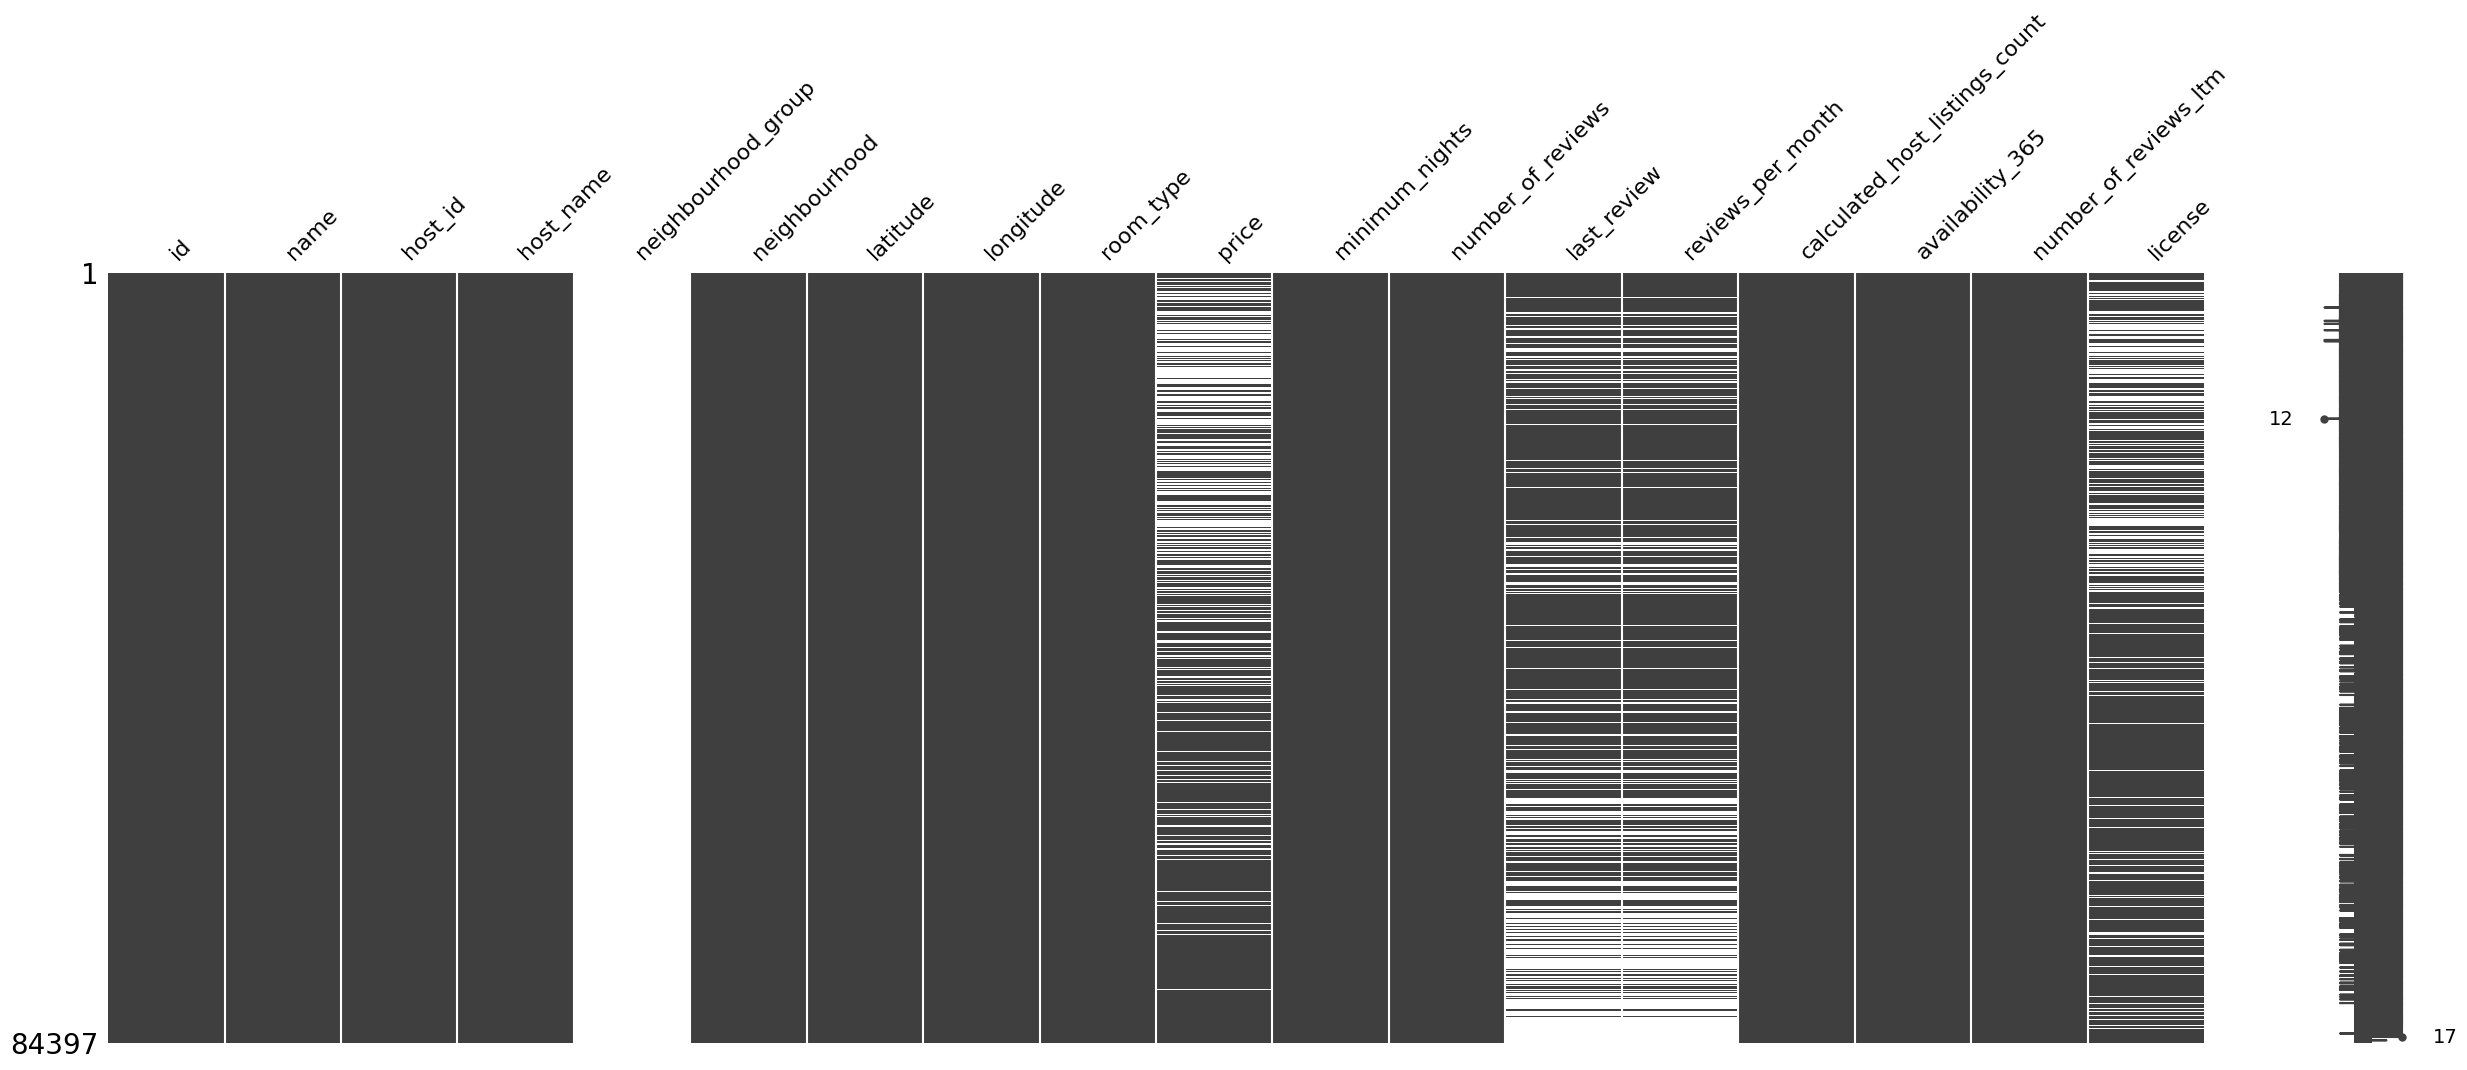

In [4]:
msno.matrix(df, figsize=(30,10));

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending = False)

neighbourhood_group               100.000000
reviews_per_month                  30.303210
last_review                        30.303210
price                              27.820894
license                            23.460550
host_name                           0.008294
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
name                                0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
host_id                             0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
id                                  0.000000
dtype: float64

In [6]:
# Verificar a existencia de valores duplicados
df.duplicated().sum() / df.shape[0]

0.0

In [7]:
df_base = df.copy()
df_base.drop(['license','neighbourhood_group'], axis = 1, inplace = True)

### **Analisando o tipo de distribuição das variáveis**
Para identificar a distribuição das variáveis, iremos plotar o histograma. Aqui removemos as colunas `license` e `neighbourhood_group`

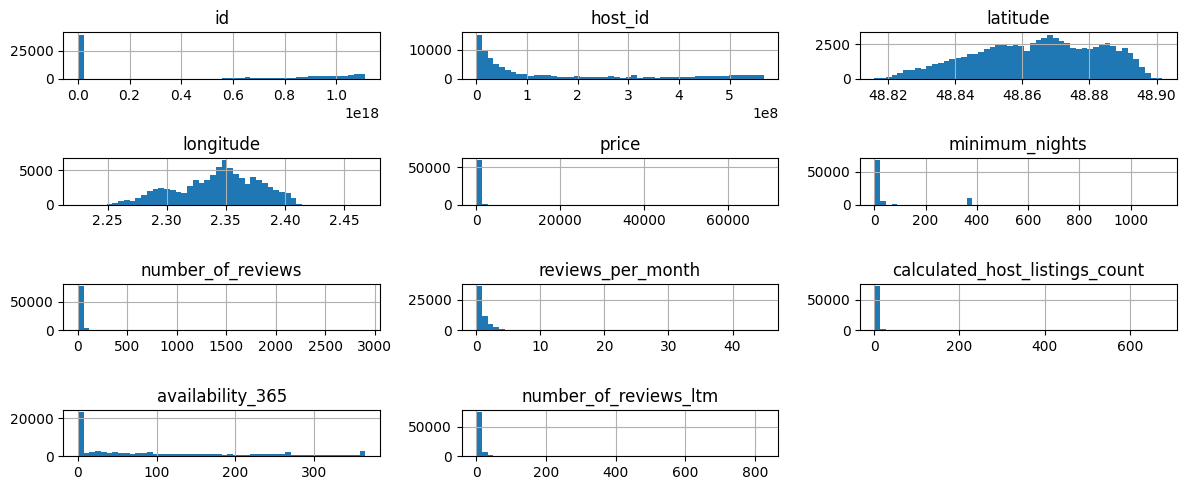

In [8]:
# plotar o histograma das variáveis numéricas
df_base.hist(bins=50, figsize=(12,5));
plt.tight_layout();

### **Há outliers presentes?**



Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [9]:
# ver a média da coluna `price``
df_base[['price','minimum_nights','number_of_reviews','reviews_per_month',
        'calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe([0.75,0.8,0.9,0.95])

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,60917.000000,84397.000000,84397.000000,58822.000000,84397.000000,84397.000000,84397.000000
mean,288.662410,48.388071,21.256751,1.032848,20.641148,116.517874,6.087017
std,728.040335,116.115319,53.420012,1.336660,79.924969,117.468480,13.020987
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,156.000000,3.000000,4.000000,0.580000,1.000000,78.000000,1.000000
75%,279.000000,7.000000,20.000000,1.370000,2.000000,213.000000,7.000000
80%,320.000000,30.000000,26.000000,1.668000,5.000000,243.000000,10.000000
90%,500.000000,365.000000,55.000000,2.580000,35.000000,306.000000,18.000000
95%,806.000000,365.000000,97.200000,3.570000,98.000000,347.000000,29.000000
max,68571.000000,1123.000000,2905.000000,44.880000,676.000000,365.000000,825.000000


Observando o resumo estatístico acima, podemos verificar algumas informações como:


*   Na variável `price` possui 75% dos valores abaixo de €279, porém possui valor máximo de €68,571.00;
*   Na variável `minimum_nights` possuimos um valor máximo de 1,123, acima do limite real de 365 dias no ano (locação por no minimo 3 anos?)



#### Boxplot para variavel `price`

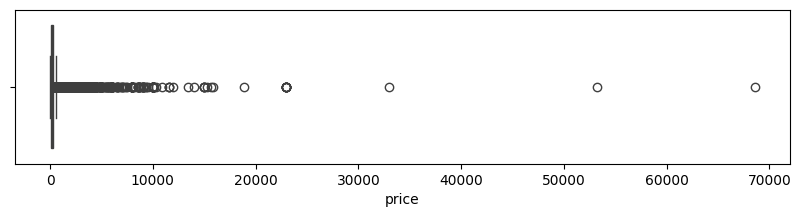



price: valores acima de €500
6019 valores acima de €500
9.88% dos valores encontrados são superiores a €500


In [10]:
# price
plt.figure(figsize = (10,2))
sns.boxplot(df_base.price, orient = "h")
plt.show()

# ver a quantidade de valores acima de 500 (90%) para price
print("\n")
print(f'price: valores acima de €500')
print(f'{len(df_base[df_base.price > 500])} valores acima de €500')
print(f"{len(df_base[df_base.price > 500]) / df_base.price.count()*100:.2f}% \
dos valores encontrados são superiores a €500")

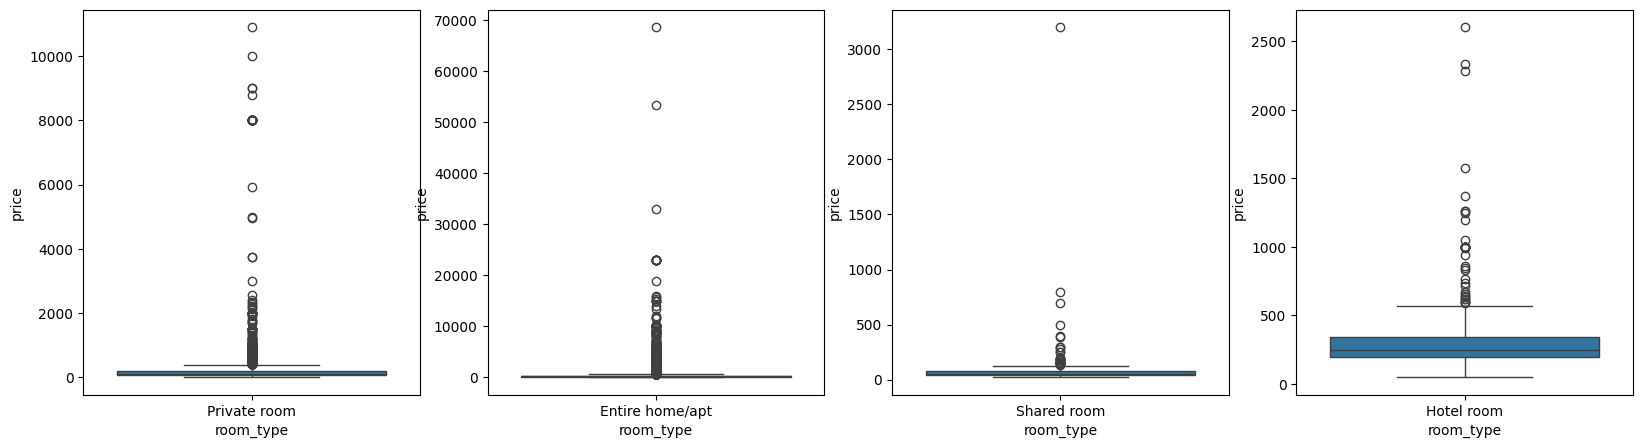

In [11]:
fig, ax = plt.subplots(ncols=4, figsize = (20,5))
for i, col in enumerate(df_base.room_type.unique()):
  _ = df_base[df_base.room_type == col]
  plt.subplot(1,4,i+1)
  sns.boxplot(y=_.price, x=_.room_type)
plt.show()

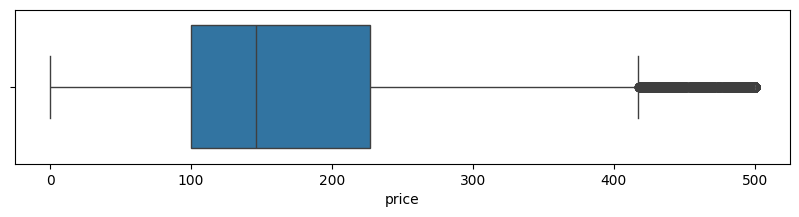

price: valores abaixo de €500
54898 valores abaixo de €500
90.12% dos valores encontrados são inferiores a €500


In [12]:
plt.figure(figsize=(10,2))
sns.boxplot(df_base.price[df_base.price <= 500], orient = "h")
plt.show()

# ver a quantidade de valores abaixo de 500 para price
print(f'price: valores abaixo de €500')
print(f'{len(df_base[df_base.price <= 500])} valores abaixo de €500')
print(f"{len(df_base[df_base.price <= 500]) / df_base.price.count()*100:.2f}% \
dos valores encontrados são inferiores a €500")

#### boxplot para `minimum_nights`

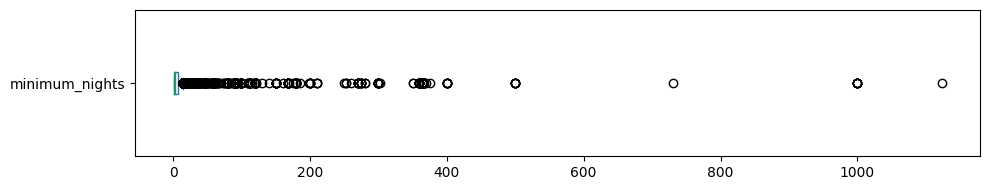



minimum_nights: valores acima de 30:
11831 valores acima de 30
14.02% dos valores encontrados são superiores a 30 noites


In [13]:
# minimum_nights
df_base.minimum_nights.plot(kind='box', vert = False, figsize = (10,2))
plt.tight_layout()
plt.show()


# ver a quantidade de valores acima de 30 dias para minimum_nights
print('\n')
print('minimum_nights: valores acima de 30:')
print(f"{len(df_base[df_base.minimum_nights > 30])} valores acima de 30")
print(f'{ len(df_base[df_base.minimum_nights > 30]) / df_base.shape[0]*100:.2f}% \
dos valores encontrados são superiores a 30 noites')

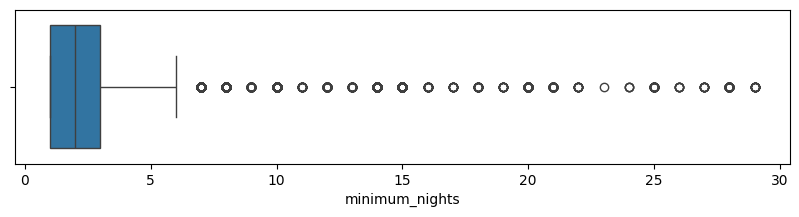

In [14]:
plt.figure(figsize = (10,2))
sns.boxplot(df_base.minimum_nights[df_base.minimum_nights < 30], orient = "h")
plt.show();

#### boxplot para `number_of_reviews`

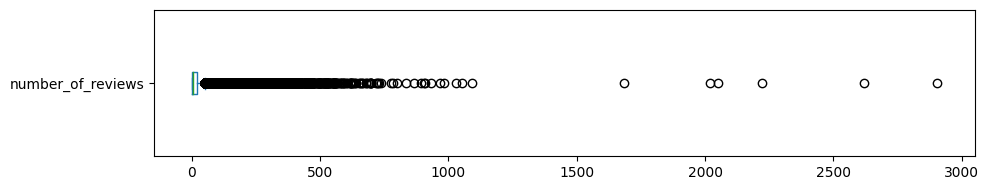



numero de reviews: valores acima de 100:
9969 valores acima de 100
11.81% dos valores encontrados são superiores a 100 noites


In [15]:
# number_of_reviews
df_base.number_of_reviews.plot(kind='box', vert = False, figsize = (10,2))
plt.tight_layout()
plt.show()


# ver a quantidade de valores acima de 30 dias para number_of_reviews
print('\n')
print('numero de reviews: valores acima de 100:')
print(f"{len(df_base[df_base.minimum_nights > 100])} valores acima de 100")
print(f'{ len(df_base[df_base.minimum_nights > 100]) / df_base.shape[0]*100 :.2f}% \
dos valores encontrados são superiores a 100 noites')

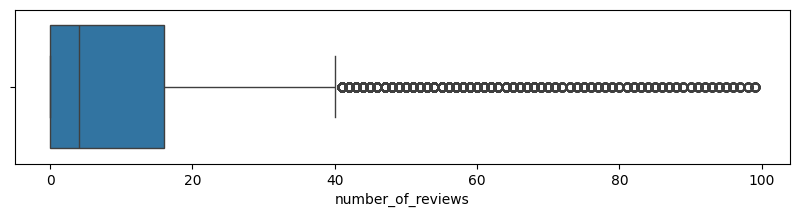

In [16]:
plt.figure(figsize = (10,2))
sns.boxplot(df_base.number_of_reviews[df_base.number_of_reviews < 100], orient = "h")
plt.show();

#### Filtrando *outliers*
Este será o Dataset que iremos utilizar para trabalhar as premissas do resumo da análise

In [17]:
df_clean = df_base.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)
df_clean.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,39948,COSY INDEPENDENT ROOM IN CENTRAL PARIS,171483,Aliyah & Philippe,Bourse,48.87068,2.34460,Private room,NaN,5,126,2024-03-06,0.99,1,2,29
2,40899,Lovely flat Canal Saint Martin Long stays,177130,Lola,Entrepôt,48.87438,2.37215,Entire home/apt,50.0,20,100,2022-08-19,0.92,1,176,0
3,3109,zen and calm,3631,Anne,Observatoire,48.83191,2.31870,Entire home/apt,250.0,2,4,2019-10-24,0.05,1,355,0
4,5396,Your perfect Paris studio on Île Saint-Louis,7903,Borzou,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,107.0,1,393,2024-03-14,2.19,2,183,61
5,165409,studio charme Haut Marais PARIS,788732,Marylin & Ophelie,Temple,48.86652,2.36261,Entire home/apt,140.0,3,106,2023-10-21,0.69,1,25,14


Filtrando o dataset, para imóveis com estádia igual ou inferior a 30 dias e preço inferior a 500, conseguimos entender melhor a distribuição dos dados.

<ipython-input-18-79f0006ca32b>:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_clean[con_cols].hist(ax=axes)


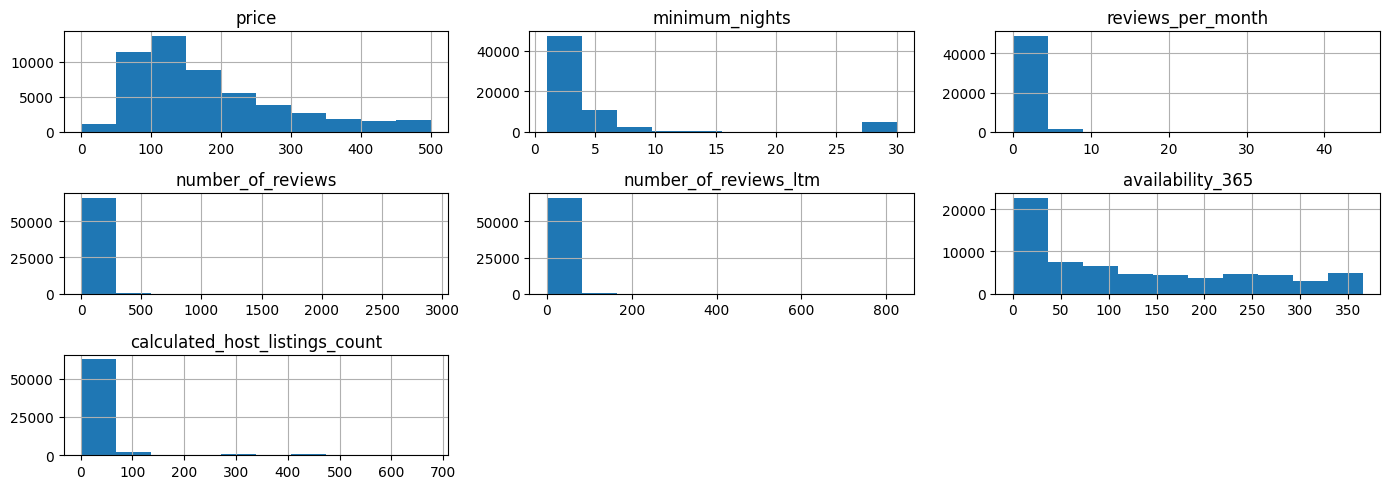

In [18]:
fig, axes = plt.subplots(figsize=(14, 5))

con_cols = ['price', 'minimum_nights', 'reviews_per_month', 'number_of_reviews',
          'number_of_reviews_ltm', 'availability_365', 'calculated_host_listings_count']


df_clean[con_cols].hist(ax=axes)
plt.tight_layout();

### **Correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

In [19]:
# criar uma matriz de correlação
corr = df_clean[con_cols].corr()

# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,reviews_per_month,number_of_reviews,number_of_reviews_ltm,availability_365,calculated_host_listings_count
price,1.000000,-0.165853,-0.082255,-0.061978,-0.100745,0.041859,0.028839
minimum_nights,-0.165853,1.000000,-0.192894,-0.081571,-0.151127,0.111591,0.060166
reviews_per_month,-0.082255,-0.192894,1.000000,0.555992,0.797630,0.174068,0.033253
number_of_reviews,-0.061978,-0.081571,0.555992,1.000000,0.707785,0.064489,-0.029502
number_of_reviews_ltm,-0.100745,-0.151127,0.797630,0.707785,1.000000,0.125849,0.000969
availability_365,0.041859,0.111591,0.174068,0.064489,0.125849,1.000000,0.147783
calculated_host_listings_count,0.028839,0.060166,0.033253,-0.029502,0.000969,0.147783,1.000000


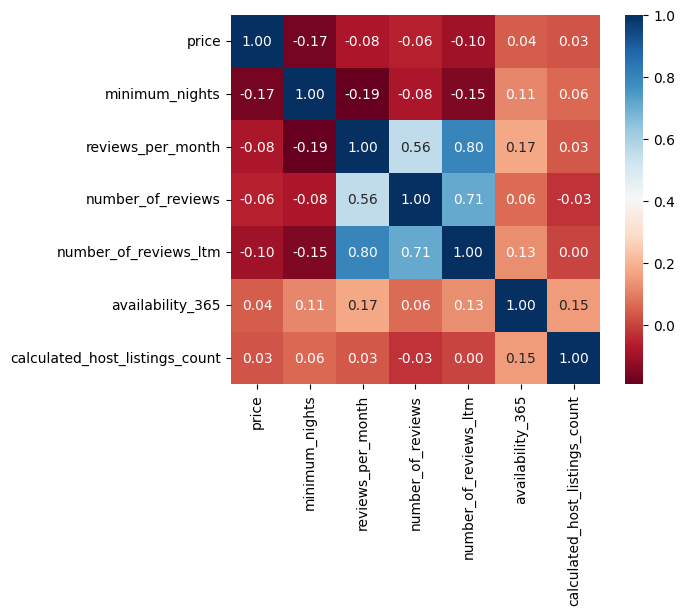

In [20]:
# plotar um heatmap a partir das correlações
ax = sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

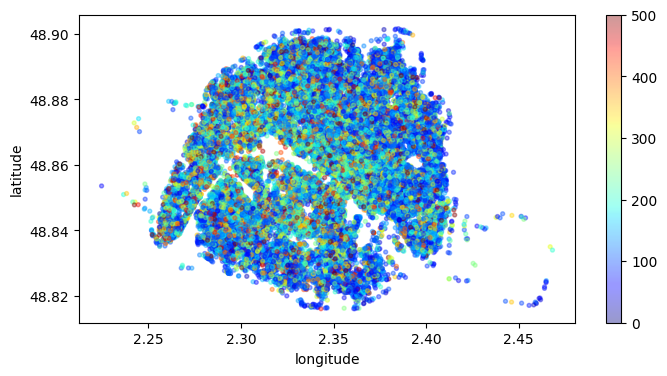

In [21]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(8,4));

### Melhores bairros para morar em Paris

* 3º arrondissement : Temple - é perto de uma grande variedade de comércios, restaurantes, lojas e bares;
* 16º arrondissement : Passy - é de fácil acesso aos parques, comércio, museus e a um estilo de vida de alto nível;
* 11º arrondissement : Popincourt -  é tido como uma das vizinhanças mais abertas de Paris;
* 1º arrondissement : Louvre - é a vizinhança certa para os que amam arquitetura, com prédios tradicionais e muitos pontos turísticos;
* 10º arrondissement : Entrepôt - é perto de restaurantes, bares, clubes noturnos, mas também apresenta boas ruas residenciais;
* 14º arrondissement : Observatoire - é perto de restaurantes, farmácias, supermercados, bom acesso a transportes, perto da *Cité Universitaire* ;

fonte: [Eurodicas - Morar em Paris](https://www.eurodicas.com.br/morar-em-paris/#melhores-bairros-para-morar-em-paris)

32% de todos os imoveis disponiveis no Airbnb estão nestes *Arrondissements*, 1/3 dos imoveis tipo `Entire home/apt` estão localizados nesses bairros.

Os bairros de *Popincourt* e *Entrepôt* são os que possuem mais `private room`, com 654 e 636 respectivamente. Vamos verificar o quanto isso influencia na média dos preços destes bairros, e posteriormente se esse comportamente se repete quando trabalharmos com o dataset filtrado por `price` e `minimum_nights`.


In [22]:
bairros = ['Entrepôt', 'Observatoire', 'Temple','Louvre','Popincourt', 'Passy']
df_bairros = df_base[df_base.neighbourhood.isin(bairros)]

In [23]:
total_rooms = df_bairros.room_type.value_counts()
total_rooms

room_type
Entire home/apt    24419
Private room        2501
Hotel room           216
Shared room          187
Name: count, dtype: int64

In [24]:
print(df_bairros.room_type.value_counts() / df.shape[0] * 100)
print(f"\nTotal:\t {total_rooms.sum()/df.shape[0] * 100:.2f}")

room_type
Entire home/apt    28.933493
Private room        2.963375
Hotel room          0.255933
Shared room         0.221572
Name: count, dtype: float64

Total:	 32.37


In [25]:
df_bairros.room_type.value_counts() / df.room_type.value_counts() * 100

room_type
Entire home/apt    32.729734
Private room       29.354460
Hotel room         27.033792
Shared room        39.787234
Name: count, dtype: float64

In [26]:
df_bairros.groupby(['neighbourhood','room_type'])['room_type'].count()

neighbourhood  room_type      
Entrepôt       Entire home/apt    5168
               Hotel room           32
               Private room        636
               Shared room          35
Louvre         Entire home/apt    1586
               Hotel room           43
               Private room        174
               Shared room           8
Observatoire   Entire home/apt    2642
               Hotel room           31
               Private room        435
               Shared room          62
Passy          Entire home/apt    4966
               Hotel room           55
               Private room        420
               Shared room          21
Popincourt     Entire home/apt    6731
               Hotel room           37
               Private room        654
               Shared room          32
Temple         Entire home/apt    3326
               Hotel room           18
               Private room        182
               Shared room          29
Name: room_type, dtype: int64

Os 6 bairros selecionados apresentam uma média de €311 enquanto os demais bairros (14) apresentam uma média de €277, 34 euros menor que dos bairros apresentados pelo site, enquanto a média do dataset total é de €288.
Quando analisamos a média por bairro de forma individual, observamos que existem bairros com a média superior a dos 6 bairros selecionados, e desses 6 bairros, temos Popincourt com a menor média dos 6 em €219.

In [27]:
df_filter = df_clean[df_clean.neighbourhood.isin(bairros)].dropna(subset= ['price'])

In [28]:
df_sem_bairros = df_base[~df_base.neighbourhood.isin(bairros)]
print(f'média de preço dos 6 bairros:\t\t{df_bairros.price.mean()}')
print(f'média de preço dos demais bairros:\t{df_sem_bairros.price.mean()}')
print(f'média de preço de todos os bairros\t{df.price.mean()}')
print(f'média de preço do dataset filtrado:\t{df_filter.price.mean()}')

média de preço dos 6 bairros:		311.343062415806
média de preço dos demais bairros:	277.5407104760973
média de preço de todos os bairros	288.6624095080191
média de preço do dataset filtrado:	183.40374095641434


In [41]:
media_total = df.groupby('neighbourhood')['price'].mean().round(2).sort_values(ascending=False)
media_clean =df_clean.groupby('neighbourhood')['price'].mean().round(2).sort_values(ascending=False)

media_total.name = 'media_total'
media_clean.name = 'media_clean'

pd.concat([media_total,media_clean],axis=1)

,media_total,media_clean
neighbourhood,,
Passy,522.44,205.07
Élysée,454.16,222.16
Palais-Bourbon,429.18,219.00
Louvre,376.88,219.40
Panthéon,359.88,203.02
Luxembourg,345.31,219.45
Opéra,324.00,193.11
Batignolles-Monceau,299.24,174.90
Hôtel-de-Ville,295.33,210.25


In [ ]:
print(f'média de noites minimas dos 6 bairros:\t\t{df_bairros.minimum_nights.mean()}')
print(f'média de noites minimas dos demais bairros:\t{df_sem_bairros.minimum_nights.mean()}')
print(f'média de noites minimas de todos os bairros\t{df.minimum_nights.mean()}')
print(f'média de noites minimas do dataset filtrado:\t{df_filter.minimum_nights.mean()}')

In [ ]:
bairro_grouped = df_bairros.groupby(['neighbourhood','room_type'])['price'].agg(['mean','median','min','max'])
filter_grouped = df_filter.groupby(['neighbourhood','room_type'])['price'].agg(['mean','median','min','max'])

bairro_grouped.columns = [f'{col}_bairro' for col in bairro_grouped.columns]
filter_grouped.columns = [f'{col}_filter' for col in filter_grouped.columns]

df_combined = pd.concat([bairro_grouped, filter_grouped],axis=1)
df_combined

In [ ]:
df_filter.groupby(['neighbourhood'])['price'].mean().sort_values()

In [ ]:
def plot_grouped(df1,df2, lista, filtro):
  fig, ax = plt.subplots(ncols=2,figsize=(20,5))
  sns.lineplot(
      data=df1.groupby(lista)[filtro].mean().reset_index(),
      x=lista[0],
      y=filtro,
      hue=lista[1],
      ax=ax[0]
  )
  sns.lineplot(
      data=df2.groupby(lista)[filtro].mean().reset_index(),
      x=lista[0],
      y=filtro,
      hue=lista[1],
      ax=ax[1]
  )
  plt.show()

In [ ]:
plot_grouped(df_bairros,df_filter,['neighbourhood','room_type'], 'price')

In [ ]:
plot_grouped(df_bairros,df_filter,['neighbourhood','room_type'], 'minimum_nights')

## Conclusões


* O 16º *Arrondissement* (**Passy**) possui a maior média de preços, na faixa dos €522, porem ao filtrarmos, vemos que a média fica inferior a região do **Louvre** que apresenta o valor de €219 frente os €204 de **Passy**;
* Popincourt está entre as regiões mais acessiveis de Paris, além de estar entre as 6 melhores regões de Paris;
* A maior parte dos imóveis disponiveis são do tipo `Entire Home/Apt`;
* Os imoveis do tipo `Hotel Room` possuem os preços mais elevados que `Entire Home/Apt` quando filtramos o dataset - pode ser devido a remoção de outliers;
* A região do Louvre possui imóveis do tipo `Private Room` mais caros do que alguns imóveis do tipo `Entire Home/Apt` na região de Popincourt, que se aproxima dos valores de `Private Room` em Passy também, o que pode ser mais um fenômeno relacionado a localização dos bairros, uma vez que *Louvre* é uma região rica no turismo e *Passy* uma região de alto padrão;
* A média por noite do dataset filtrado (`minimum_nights` < 30 e `price` < 500) é de €183 com a média do `minimum_nights` de 5 noites;



Não focamos tanto a atenção para imóveis do tipo `Hotel Room` devido ao público que utiliza o Airbnb, pois este normalmente não está a procura de hoteis nesta plataforma.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.

#Referências:
* [Sortir A Paris](https://www.sortiraparis.com/pt/noticias/em-paris/articles/270493-imobiliario-em-paris-aqui-e-a-rua-mais-cara-da-capital)
* [Visit World](https://visitworld.today/pt/blog/1637/where-to-stay-in-paris-best-neighborhoods-and-cost-of-living)
* [Wikipedia - Arrondissements de Paris](https://pt.wikipedia.org/wiki/Arrondissements_de_Paris)
* [Tudo Sobre Paris](https://www.tudosobreparis.com/bairros-e-zonas)
* [Eurodicas](https://www.eurodicas.com.br/morar-em-paris/#melhores-bairros-para-morar-em-paris)
* [Meilleurs Agents](https://www.meilleursagents.com/)
* [Relatório Imobiliário de Paris](https://backyard-static.meilleursagents.com/press/46801e7d9d0d2b2a3a5edc7d640c7ca3345d0165.pdf)
